In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X = load('../../preprocessing/clustering_data.joblib')

In [3]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.000000,0.00000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.891594,0.00000,0.0,0.0,0.0,1.000,1.0,0.800,0.6,0.007500,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.548717,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434425,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999829,0.03125,0.0,0.0,0.0,1.000,1.0,0.384,0.0,0.229375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.cluster import KMeans

In [5]:
from sklearn.metrics import silhouette_score

ks = [i for i in range(2, 10)]
sse = []
silhouettes = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))


In [6]:
sse

[263730.2347059928,
 225219.32917675324,
 200375.55403374485,
 179631.11116113752,
 170815.04791800302,
 162996.75526916859,
 157890.17394239394,
 153572.51159862799]

In [7]:
silhouettes

[0.20776533633794014,
 0.2169378644436047,
 0.20523172115941526,
 0.2153896163311105,
 0.2098480389934779,
 0.1933645448985916,
 0.18399999589177102,
 0.15436259587421414]

Text(0, 0.5, 'SSE')

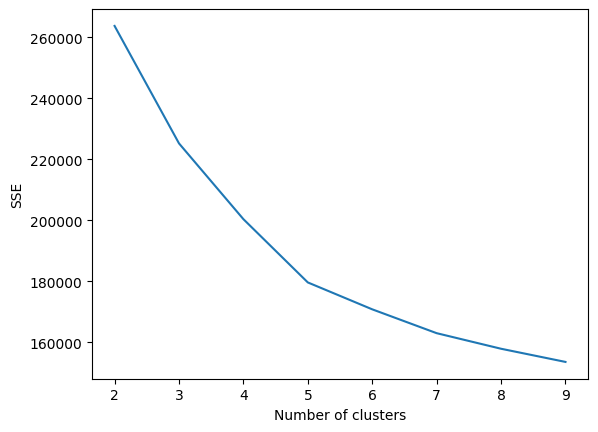

In [8]:
plt.plot(ks, sse)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

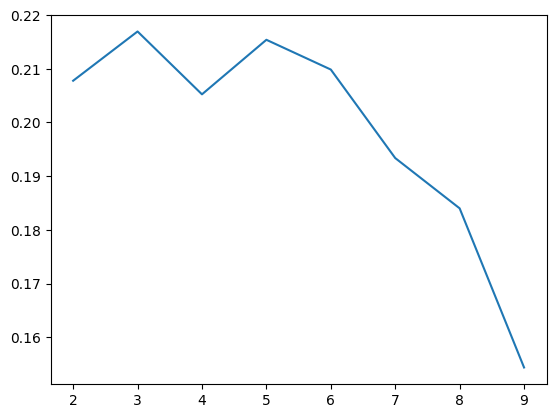

In [9]:
plt.plot(ks, silhouettes)

In [10]:
from sklearn.cluster import BisectingKMeans

In [11]:
sse_bisecting = []
silhouettes_bisecting = []


for k in ks:
    bkmeans = BisectingKMeans(n_clusters=k, bisecting_strategy='largest_cluster')
    bkmeans.fit(X)
    
    sse_bisecting.append(bkmeans.inertia_)
    silhouettes_bisecting.append(silhouette_score(X, bkmeans.labels_))


In [12]:
sse_bisecting

[263735.71322036994,
 225962.20330286038,
 206129.65968826352,
 194570.85018455828,
 183937.64817483435,
 174094.7130064088,
 170371.9486220951,
 162412.76507679254]

Text(0, 0.5, 'SSE')

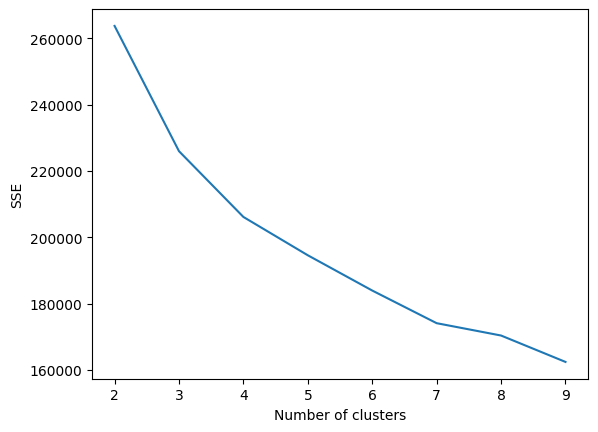

In [13]:
plt.plot(ks, sse_bisecting)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

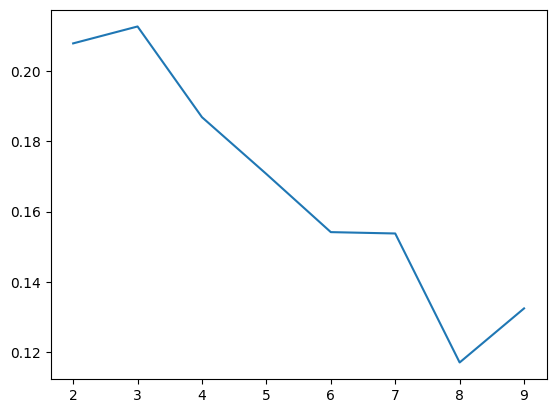

In [15]:
plt.plot(ks, silhouettes_bisecting)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [19]:
kmeans2 = KMeans(n_clusters=2, n_init=10)
kmeans2.fit(X)

KMeans(n_clusters=2, n_init=10)

In [20]:
kmeans3 = KMeans(n_clusters=3, n_init=10)
kmeans3.fit(X)

KMeans(n_clusters=3, n_init=10)

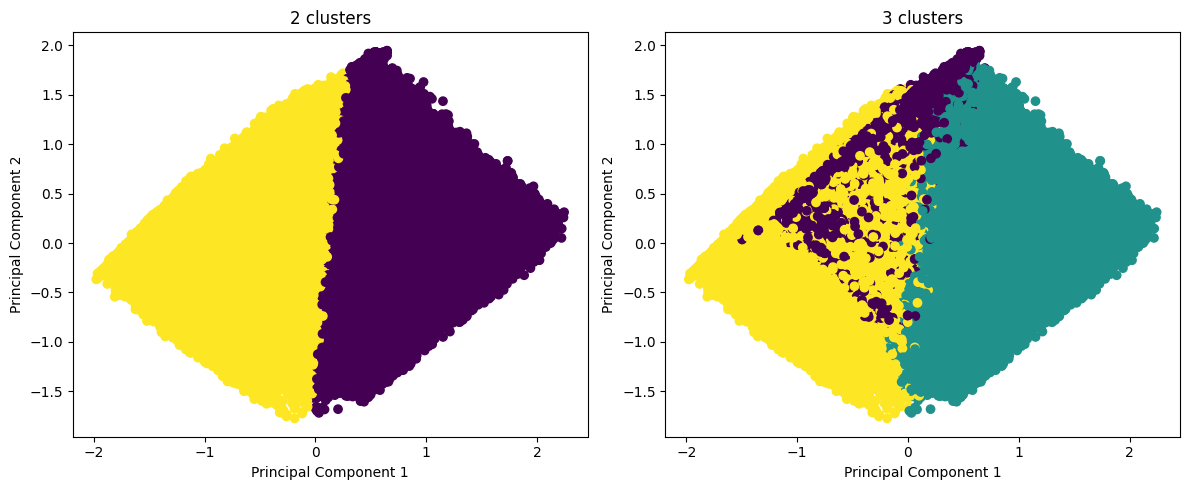

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans2.labels_)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('2 clusters')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans3.labels_)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('3 clusters')

plt.tight_layout()

In [26]:
bkmeans2 = BisectingKMeans(n_clusters=2, bisecting_strategy='largest_cluster')
bkmeans2.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=2)

In [27]:

bkmeans3 = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')
bkmeans3.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

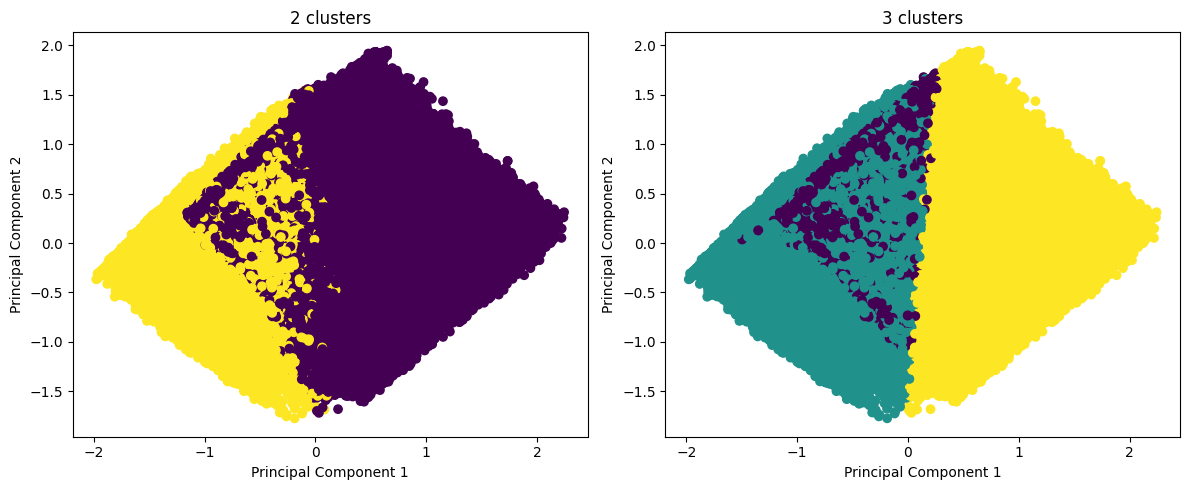

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=bkmeans2.labels_)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('2 clusters')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=bkmeans3.labels_)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('3 clusters')

plt.tight_layout()